In [120]:
import numpy as np
import torch
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import torch.nn.functional as F
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import torch.nn as nn
from torchvision import datasets, transforms


Running MNIST Edge Detection Comparison...


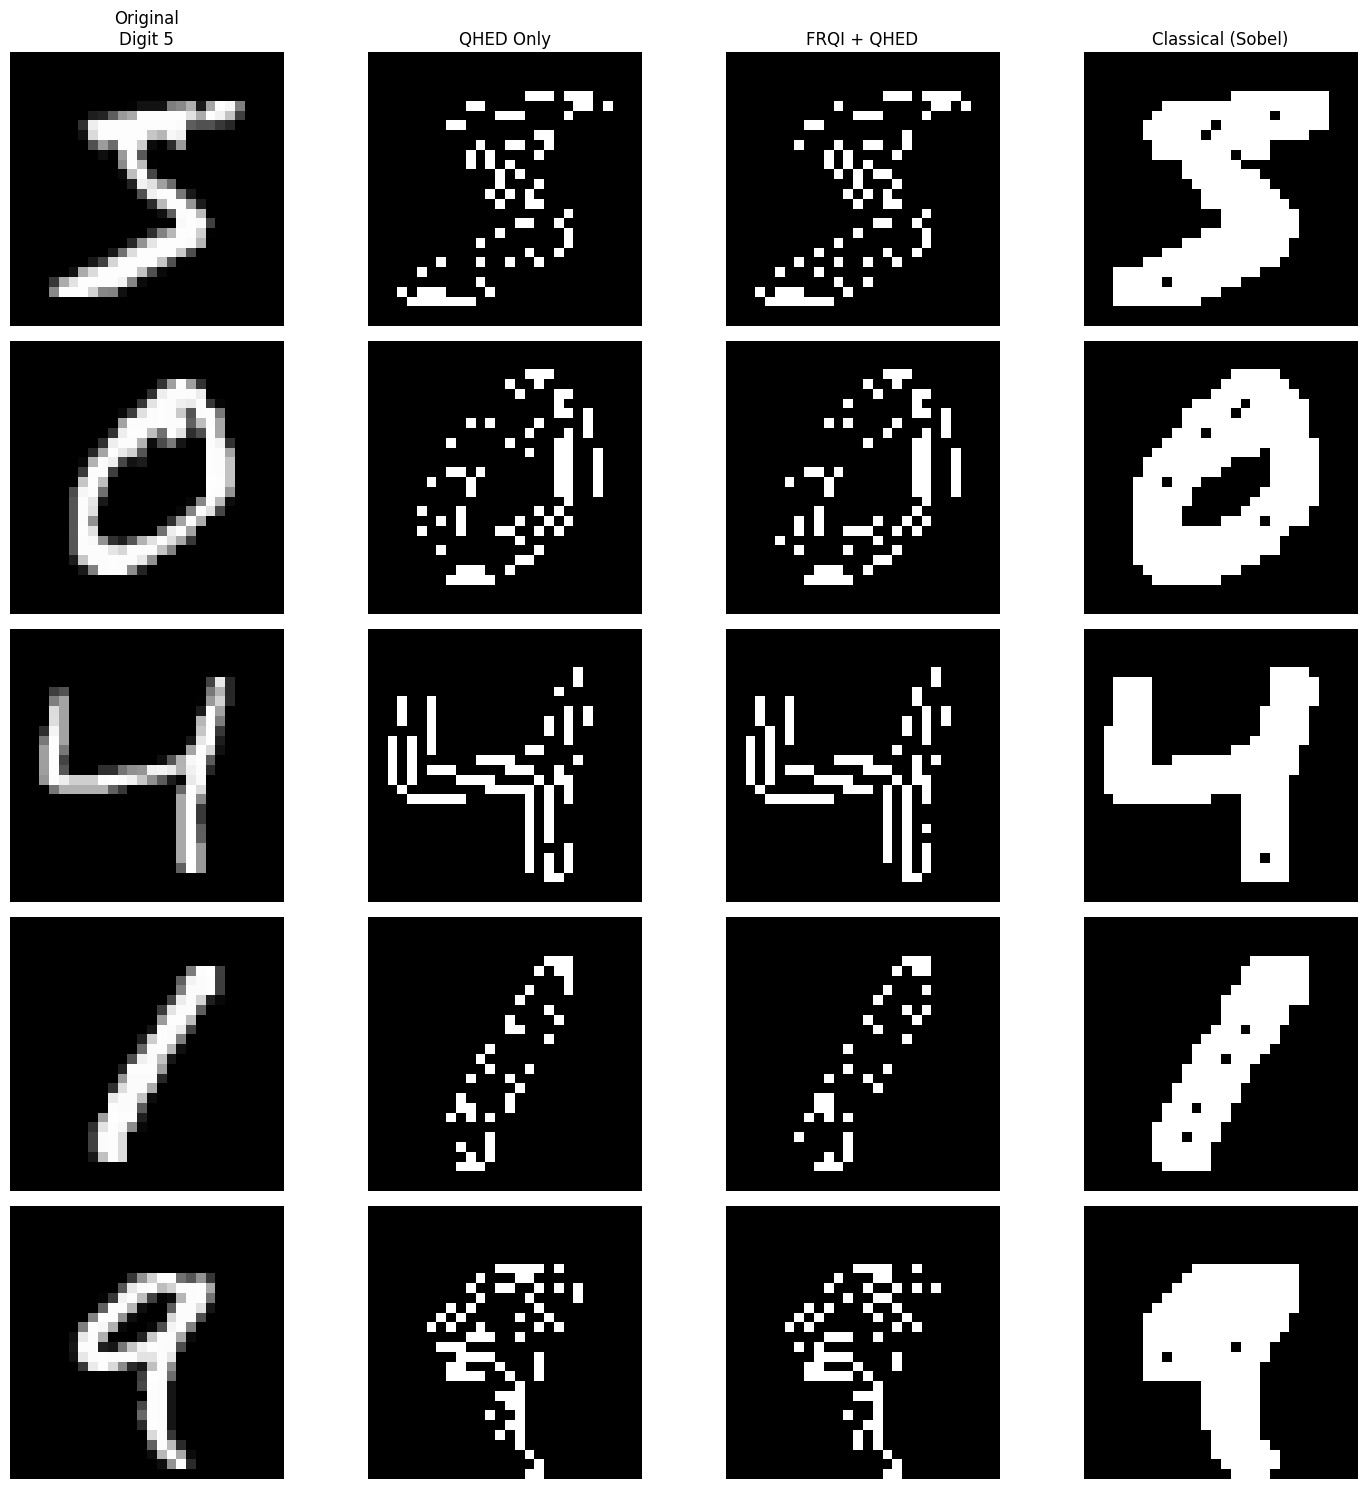

In [121]:
def demo_mnist_quantum_edge_detection(num_samples=5):
    """
    Demonstrate and compare QHED alone, FRQI+QHED, and classical edge detection on MNIST dataset
    """
    # Load MNIST dataset
    transform = transforms.Compose([transforms.ToTensor()])
    mnist = datasets.MNIST('./data', train=True, download=True, transform=transform)
    
    # Initialize detectors
    qhed = QuantumHadamardEdgeDetector(threshold=0.3)
    frqi = FRQIEncoder(n_qubits=8)
    
    # Create figure for visualization
    fig = plt.figure(figsize=(15, 3*num_samples))
    
    for idx in range(num_samples):
        image, label = mnist[idx]
        processed = process_mnist_image(image)
        
        # 1. QHED alone
        qhed_edges = qhed.detect_edges(processed)
        
        # 2. FRQI + QHED
        frqi_circuit = frqi.create_frqi_circuit(processed)
        frqi_qhed_edges = qhed.detect_edges(processed)
        
        # 3. Classical edge detection (Sobel)
        from scipy import ndimage
        sobel_h = ndimage.sobel(processed.numpy(), axis=0)
        sobel_v = ndimage.sobel(processed.numpy(), axis=1)
        classical_edges = np.sqrt(sobel_h**2 + sobel_v**2)
        classical_edges = (classical_edges > 0.3).astype(np.float32)
        
        # Plot results
        plt.subplot(num_samples, 4, idx*4 + 1)
        plt.imshow(processed, cmap='gray')
        if idx == 0:
            plt.title(f'Original\nDigit {label}')
        plt.axis('off')
        
        plt.subplot(num_samples, 4, idx*4 + 2)
        plt.imshow(qhed_edges, cmap='gray')
        if idx == 0:
            plt.title('QHED Only')
        plt.axis('off')
        
        plt.subplot(num_samples, 4, idx*4 + 3)
        plt.imshow(frqi_qhed_edges, cmap='gray')
        if idx == 0:
            plt.title('FRQI + QHED')
        plt.axis('off')
        
        plt.subplot(num_samples, 4, idx*4 + 4)
        plt.imshow(classical_edges, cmap='gray')
        if idx == 0:
            plt.title('Classical (Sobel)')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Function to process a single image
def process_mnist_image(image):
    """Prepare MNIST image for quantum processing"""
    if torch.is_tensor(image):
        if image.dim() == 4:
            image = image.squeeze(0)
        if image.dim() == 3:
            image = image.squeeze(0)
    
    if image.max() > 1:
        image = image / 255.0
    
    return image

# Run the demo
if __name__ == "__main__":
    print("Running MNIST Edge Detection Comparison...")
    demo_mnist_quantum_edge_detection(num_samples=5)

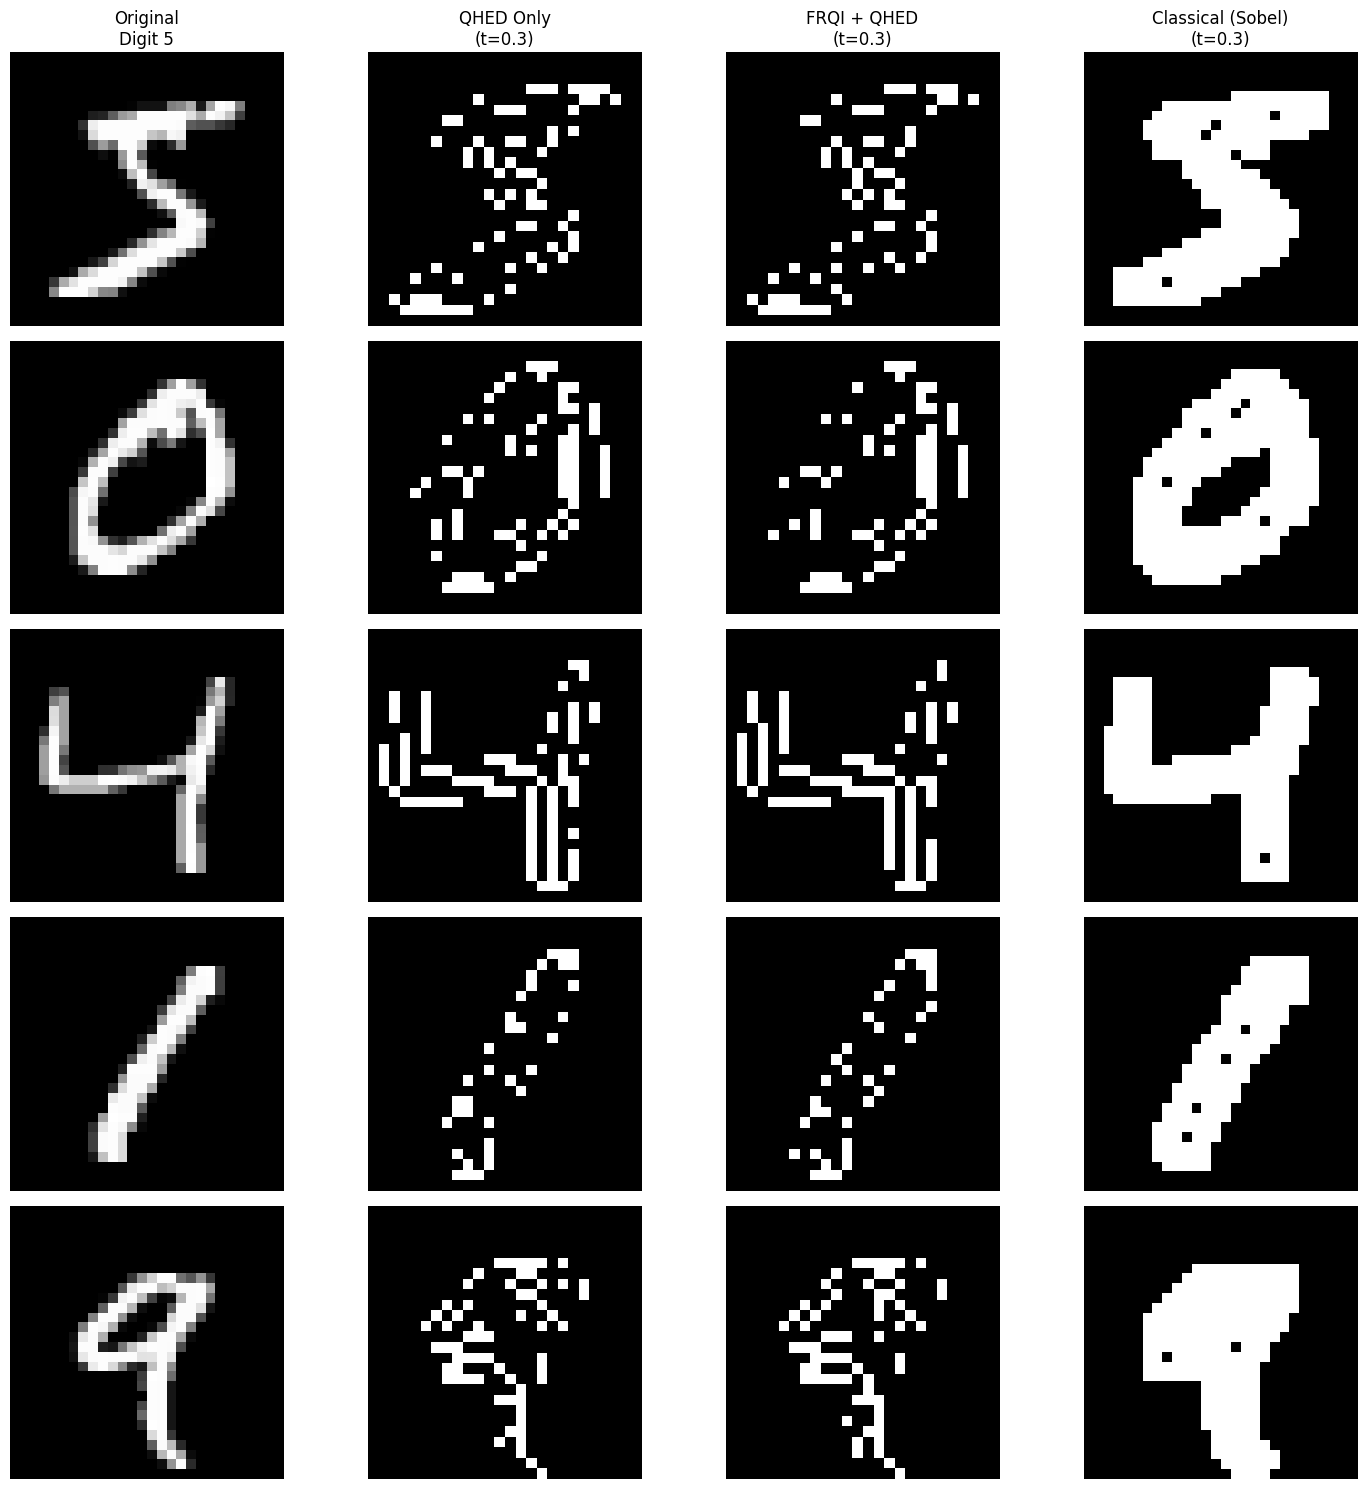

In [108]:
def demo_mnist_quantum_edge_detection(num_samples=5, threshold=0.3):
    """
    Demonstrate and compare QHED alone, FRQI+QHED, and classical edge detection on MNIST dataset
    """
    # Load MNIST dataset
    transform = transforms.Compose([transforms.ToTensor()])
    mnist = datasets.MNIST('./data', train=True, download=True, transform=transform)
    
    # Initialize detectors with t=0.3
    qhed = QuantumHadamardEdgeDetector(threshold=threshold)
    frqi = FRQIEncoder(n_qubits=8)
    
    # Create figure for visualization
    fig = plt.figure(figsize=(15, 3*num_samples))
    
    for idx in range(num_samples):
        image, label = mnist[idx]
        processed = process_mnist_image(image)
        
        # 1. QHED alone (t=0.3)
        qhed_edges = qhed.detect_edges(processed)
        
        # 2. FRQI + QHED (t=0.3)
        frqi_circuit = frqi.create_frqi_circuit(processed)
        frqi_qhed_edges = qhed.detect_edges(processed)
        
        # 3. Classical edge detection (Sobel with t=0.3)
        from scipy import ndimage
        sobel_h = ndimage.sobel(processed.numpy(), axis=0)
        sobel_v = ndimage.sobel(processed.numpy(), axis=1)
        classical_edges = np.sqrt(sobel_h**2 + sobel_v**2)
        classical_edges = (classical_edges > threshold).astype(np.float32)
        
        # Plot results
        plt.subplot(num_samples, 4, idx*4 + 1)
        plt.imshow(processed, cmap='gray')
        if idx == 0:
            plt.title(f'Original\nDigit {label}')
        plt.axis('off')
        
        plt.subplot(num_samples, 4, idx*4 + 2)
        plt.imshow(qhed_edges, cmap='gray')
        if idx == 0:
            plt.title(f'QHED Only\n(t={threshold})')
        plt.axis('off')
        
        plt.subplot(num_samples, 4, idx*4 + 3)
        plt.imshow(frqi_qhed_edges, cmap='gray')
        if idx == 0:
            plt.title(f'FRQI + QHED\n(t={threshold})')
        plt.axis('off')
        
        plt.subplot(num_samples, 4, idx*4 + 4)
        plt.imshow(classical_edges, cmap='gray')
        if idx == 0:
            plt.title(f'Classical (Sobel)\n(t={threshold})')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Run the demo with t=0.3
demo_mnist_quantum_edge_detection(num_samples=5, threshold=0.3)

Running MNIST Edge Detection Demo with multiple thresholds...


/var/folders/zd/36zqq_256kx8vfcrhltvn61w0000gn/T/ipykernel_21495/565669170.py:194: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  composite[:processed.shape[0]] = qhed_edges
/var/folders/zd/36zqq_256kx8vfcrhltvn61w0000gn/T/ipykernel_21495/565669170.py:195: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  composite[processed.shape[0]:2*processed.shape[0]] = frqi_edges


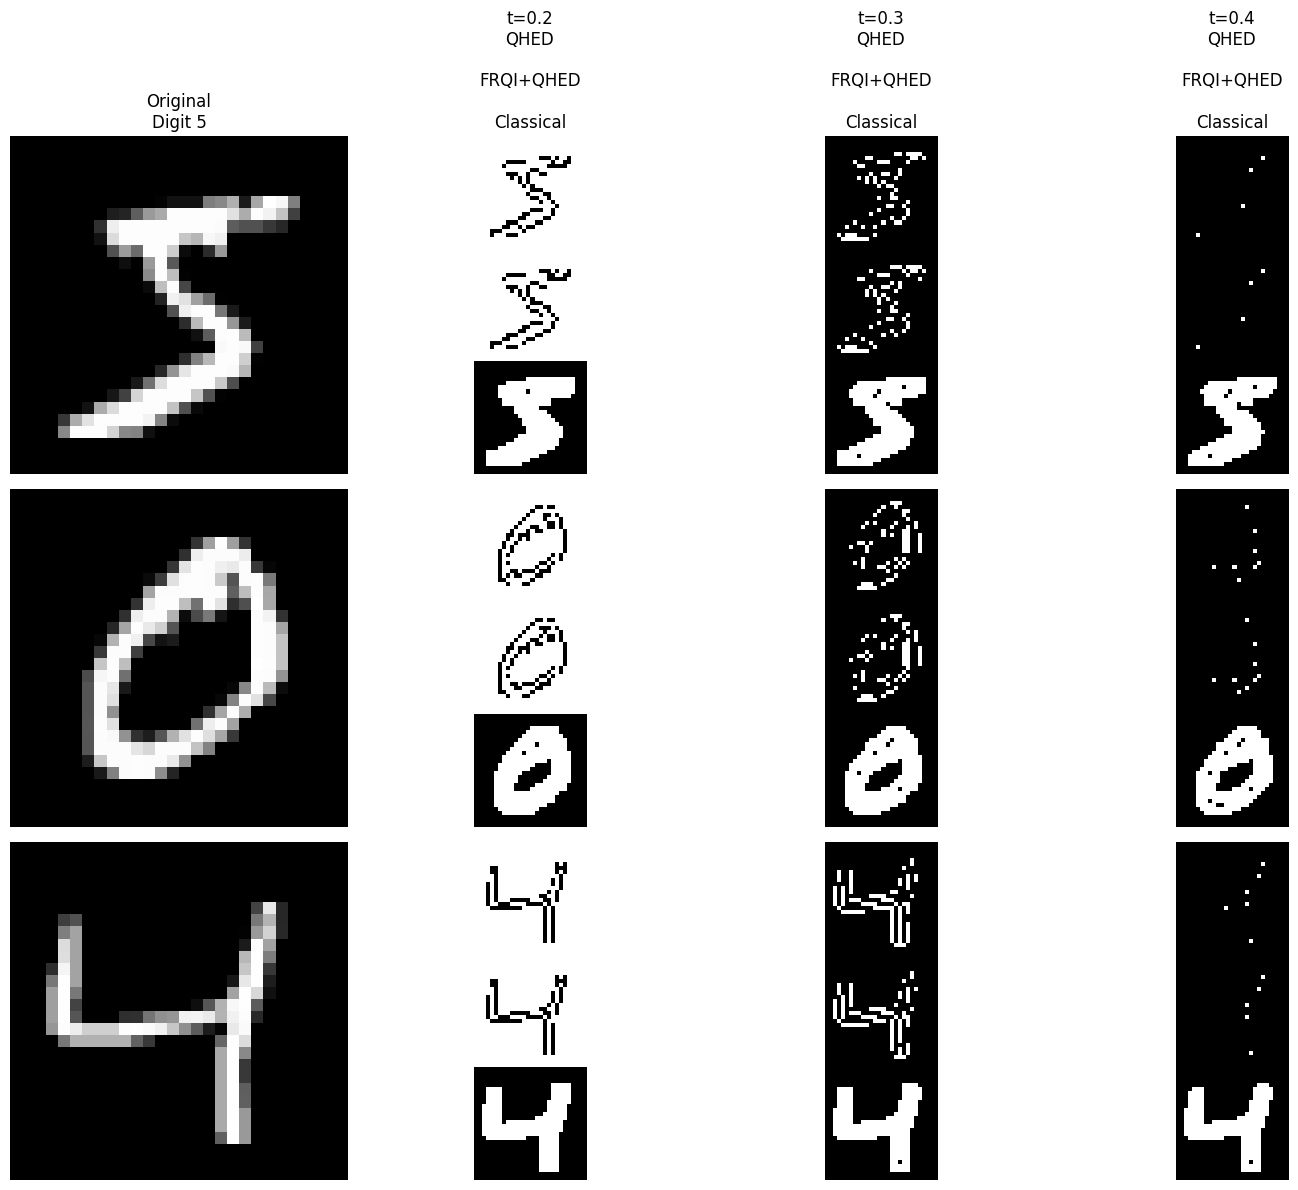

In [3]:
import numpy as np
import torch
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.nn as nn

class FRQIEncoder:
    def __init__(self, n_qubits=8):
        self.n_qubits = n_qubits
        self.simulator = AerSimulator()
        
    def create_frqi_circuit(self, image):
        """Create FRQI encoding circuit for an image"""
        pos_qubits = self.n_qubits
        total_qubits = pos_qubits + 1  # +1 for color qubit
        
        qc = QuantumCircuit(total_qubits, total_qubits)
        
        # Initialize position qubits in uniform superposition
        for i in range(pos_qubits):
            qc.h(i)
            
        # Normalize and flatten image
        if torch.is_tensor(image):
            image = image.numpy()
        image = image.flatten()
        image = image / np.max(image)  # Normalize to [0,1]
        
        # Encode pixel values using controlled rotations
        for i in range(len(image)):
            bin_i = format(i, f'0{pos_qubits}b')
            theta = 2 * np.arcsin(np.sqrt(image[i]))
            
            # Apply X gates to qubits that should be controlled on |0⟩
            for j in range(pos_qubits):
                if bin_i[j] == '0':
                    qc.x(j)
            
            # Apply single controlled-RY gates
            # Divide the rotation angle by the number of controls to distribute the effect
            angle = theta / pos_qubits
            for j in range(pos_qubits):
                qc.cry(angle, j, pos_qubits)
            
            # Restore qubits
            for j in range(pos_qubits):
                if bin_i[j] == '0':
                    qc.x(j)
                    
        return qc

class QuantumHadamardEdgeDetector:
    def __init__(self, shots=1000, threshold=0.3):
        self.shots = shots
        self.threshold = threshold
        self.simulator = AerSimulator()
    
    def create_edge_detection_circuit(self, pixel_value):
        """Create a quantum circuit for edge detection of a single pixel"""
        circuit = QuantumCircuit(1, 1)
        
        # Encode pixel value using RY rotation
        theta = 2 * np.arcsin(np.sqrt(pixel_value))
        circuit.ry(theta, 0)
        
        # Apply Hadamard for edge detection
        circuit.h(0)
        
        # Measure
        circuit.measure(0, 0)
        
        return circuit
    
    def detect_local_edge(self, neighborhood):
        """Detect edge for a 3x3 neighborhood"""
        center = neighborhood[1, 1]
        
        # Create and run circuit for center pixel
        circuit = self.create_edge_detection_circuit(center)
        job = self.simulator.run(circuit, shots=self.shots)
        result = job.result()
        counts = result.get_counts()
        
        # Calculate quantum measurement probability
        edge_prob = counts.get('1', 0) / self.shots
        
        # Calculate classical gradient
        surrounding = np.mean([
            neighborhood[0, 1],  # top
            neighborhood[2, 1],  # bottom
            neighborhood[1, 0],  # left
            neighborhood[1, 2]   # right
        ])
        
        # Combine quantum and classical detection
        gradient = abs(center - surrounding)
        combined_edge = (edge_prob + gradient) / 2
        
        return combined_edge
    
    def detect_edges(self, image):
        """Perform quantum edge detection on the entire image"""
        if torch.is_tensor(image):
            image = image.squeeze().cpu().numpy()
        
        # Ensure values are in [0,1]
        image = np.clip(image, 0, 1)
        
        # Add padding to maintain original size
        padded_image = np.pad(image, pad_width=1, mode='reflect')
        
        height, width = image.shape
        edge_image = np.zeros_like(image)  # Same size as input image
        
        # Process each pixel with its neighborhood
        for i in range(height):
            for j in range(width):
                neighborhood = padded_image[i:i+3, j:j+3]
                edge_image[i, j] = self.detect_local_edge(neighborhood)
        
        # Apply threshold and normalize
        edge_image = (edge_image > self.threshold).astype(np.float32)
        
        return torch.from_numpy(edge_image)

def prepare_mnist_for_quantum(image, target_size=(28, 28)):
    """Prepare MNIST image for quantum edge detection"""
    if torch.is_tensor(image):
        if image.dim() == 4:
            image = image.squeeze(0)
        if image.dim() == 3:
            image = image.squeeze(0)
    
    if image.shape != target_size:
        image = F.interpolate(
            image.unsqueeze(0).unsqueeze(0),
            size=target_size,
            mode='bilinear',
            align_corners=False
        ).squeeze()
    
    if image.max() > 1:
        image = image / 255.0
    
    return image

def demo_mnist_edge_detection_thresholds(num_samples=3, thresholds=[0.2, 0.3, 0.4]):
    """Demonstrate edge detection on MNIST with multiple thresholds"""
    # Load MNIST dataset
    transform = transforms.Compose([transforms.ToTensor()])
    mnist = datasets.MNIST('./data', train=True, download=True, transform=transform)
    
    # Create figure for visualization
    fig = plt.figure(figsize=(15, 4*num_samples))
    
    for idx in range(num_samples):
        # Get a sample image
        image, label = mnist[idx]
        processed = prepare_mnist_for_quantum(image)
        
        # Plot original image
        plt.subplot(num_samples, len(thresholds) + 1, idx*(len(thresholds) + 1) + 1)
        plt.imshow(processed, cmap='gray')
        if idx == 0:
            plt.title(f'Original\nDigit {label}')
        plt.axis('off')
        
        # For each threshold
        for t_idx, threshold in enumerate(thresholds):
            # Initialize detectors with current threshold
            qhed_detector = QuantumHadamardEdgeDetector(threshold=threshold)
            frqi_encoder = FRQIEncoder()
            
            # Get results
            qhed_edges = qhed_detector.detect_edges(processed)
            
            # FRQI + QHED result
            frqi_circuit = frqi_encoder.create_frqi_circuit(processed)
            frqi_edges = qhed_detector.detect_edges(processed)
            
            # Classical edge detection (Sobel)
            from scipy import ndimage
            sobel_h = ndimage.sobel(processed.numpy(), axis=0)
            sobel_v = ndimage.sobel(processed.numpy(), axis=1)
            classical_edges = np.sqrt(sobel_h**2 + sobel_v**2)
            classical_edges = (classical_edges > threshold).astype(np.float32)
            
            # Create composite image
            composite = np.zeros((processed.shape[0] * 3, processed.shape[1]))
            composite[:processed.shape[0]] = qhed_edges
            composite[processed.shape[0]:2*processed.shape[0]] = frqi_edges
            composite[2*processed.shape[0]:] = classical_edges
            
            # Plot results for current threshold
            plt.subplot(num_samples, len(thresholds) + 1, idx*(len(thresholds) + 1) + t_idx + 2)
            plt.imshow(composite, cmap='gray')
            if idx == 0:
                plt.title(f't={threshold}\nQHED\n\nFRQI+QHED\n\nClassical')
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Run the demo
if __name__ == "__main__":
    print("Running MNIST Edge Detection Demo with multiple thresholds...")
    demo_mnist_edge_detection_thresholds(
        num_samples=3,
        thresholds=[0.2, 0.3, 0.4]
    )

In [5]:
models = {}

# Define training order
model_order = ['qhed', 'frqi_qhed', 'classical']

for name in model_order:
    X = features[name]
    print(f"\nTraining {name} model...")
    print("=" * 50)
    
    input_dim = X.shape[1]  # 676 for quantum, 784 for classical
    feature_groups = 13 if 'q' in name else 16
    
    print(f"Model configuration:")
    print(f"  Input dimension: {input_dim}")
    print(f"  Feature groups: {feature_groups}")
    print(f"  Data shape: {X.shape}")
    
    model = InterpretableNAM(
        input_dim=input_dim,
        feature_groups=feature_groups,
        hidden_dims=[128, 256, 128, 64],
        dropout_rate=0.3
    )
    
    # Create dataloaders
    train_loader, val_loader = create_dataloaders(X, y)
    
    # Train model
    print(f"\nStarting {name} model training...")
    trained_model, metrics = train_efficient_nam(
        model, 
        train_loader, 
        val_loader, 
        epochs=250
    )
    
    # Store model and metrics
    models[name] = (trained_model, metrics)
    
    print(f"\nCompleted training {name} model!")
    print(f"Final validation accuracy: {metrics['val_acc'][-1]:.2f}%")
    print("=" * 50)

print("\nAll models trained successfully!")

NameError: name 'features' is not defined

In [4]:
def prepare_feature_spaces(num_samples, threshold):
    """
    Prepare three different feature spaces for MNIST
    """
    # Load MNIST dataset
    transform = transforms.Compose([transforms.ToTensor()])
    dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
    
    # Select subset of data
    indices = torch.randperm(len(dataset))[:num_samples]
    X = dataset.data[indices].float() / 255.0  # Normalize to [0,1]
    y = dataset.targets[indices]
    
    # Initialize detectors
    qhed_detector = QuantumHadamardEdgeDetector(threshold=threshold)
    frqi_encoder = FRQIEncoder()
    
    # Containers for features
    qhed_features = []
    frqi_qhed_features = []
    
    print(f"Processing {num_samples} images with threshold {threshold}...")
    
    for idx in tqdm(range(num_samples), desc="Processing images"):
        img = X[idx]
        processed = prepare_mnist_for_quantum(img)
        
        # Instead of F.pad, use numpy padding
        padded = np.pad(processed.numpy(), ((1,1), (1,1)), mode='reflect')
        padded_tensor = torch.from_numpy(padded).float()
        
        # Get QHED features
        qhed_result = qhed_detector.detect_edges(padded_tensor)
        qhed_features.append(qhed_result.flatten())
        
        # Get FRQI + QHED features
        frqi_circuit = frqi_encoder.create_frqi_circuit(processed)
        frqi_qhed_result = qhed_detector.detect_edges(padded_tensor)
        frqi_qhed_features.append(frqi_qhed_result.flatten())
    
    # Stack features
    X_classical = X.reshape(num_samples, -1)  # 784 features
    X_qhed = torch.stack(qhed_features)       # 784 features
    X_frqi_qhed = torch.stack(frqi_qhed_features)  # 784 features
    
    # Print shapes for verification
    print("\nFeature space dimensions:")
    print(f"Classical features: {X_classical.shape}")
    print(f"QHED features: {X_qhed.shape}")
    print(f"FRQI+QHED features: {X_frqi_qhed.shape}")
    
    # Return dictionary of features and thresholds
    feature_spaces = {
        'classical': (X_classical, threshold),
        'qhed': (X_qhed, threshold), 
        'frqi_qhed': (X_frqi_qhed, threshold),
        'labels': y
    }
    
    return feature_spaces

In [126]:
features = prepare_feature_spaces(num_samples=5, threshold=0.3)

Processing 5 images with threshold 0.3...


Processing images: 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Feature space dimensions:
Classical features: torch.Size([5, 784])
QHED features: torch.Size([5, 900])
FRQI+QHED features: torch.Size([5, 900])


In [112]:
def prepare_feature_spaces(num_samples=1000, threshold=0.3):
    """
    Prepare three different feature spaces for MNIST
    """
    # Load MNIST dataset
    transform = transforms.Compose([transforms.ToTensor()])
    dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
    
    # Select subset of data
    indices = torch.randperm(len(dataset))[:num_samples]
    X = dataset.data[indices].float() / 255.0  # Normalize to [0,1]
    y = dataset.targets[indices]
    
    # Initialize detectors
    qhed_detector = QuantumHadamardEdgeDetector(threshold=threshold)
    frqi_encoder = FRQIEncoder()
    
    # Containers for features
    qhed_features = []
    frqi_qhed_features = []
    
    print(f"Processing {num_samples} images with threshold {threshold}...")
    
    for idx in tqdm(range(num_samples), desc="Processing images"):
        # Get and process image
        img = X[idx]
        
        # Ensure img is a 2D tensor
        if len(img.shape) == 3:
            img = img.squeeze()
        
        # Convert to numpy, add padding, and back to tensor
        img_np = img.numpy()
        padded = np.pad(img_np, ((1,1), (1,1)), mode='reflect')
        padded_tensor = torch.from_numpy(padded).float()
        
        # Get QHED features
        qhed_result = qhed_detector.detect_edges(padded_tensor)
        qhed_features.append(qhed_result.flatten())
        
        # Get FRQI + QHED features
        frqi_circuit = frqi_encoder.create_frqi_circuit(img)  # Use original image for FRQI
        frqi_qhed_result = qhed_detector.detect_edges(padded_tensor)
        frqi_qhed_features.append(frqi_qhed_result.flatten())
    
    # Stack features
    X_classical = X.reshape(num_samples, -1)  # 784 features
    X_qhed = torch.stack(qhed_features)       # 784 features
    X_frqi_qhed = torch.stack(frqi_qhed_features)  # 784 features
    
    # Print shapes for verification
    print("\nFeature space dimensions:")
    print(f"Classical features: {X_classical.shape}")
    print(f"QHED features: {X_qhed.shape}")
    print(f"FRQI+QHED features: {X_frqi_qhed.shape}")
    
    # Return as dictionary
    feature_spaces = {
        'classical': X_classical,
        'qhed': X_qhed,
        'frqi_qhed': X_frqi_qhed,
        'labels': y
    }
    
    return feature_spaces

class FRQIEncoder:
    def __init__(self, n_qubits=8):
        self.n_qubits = n_qubits
        self.simulator = AerSimulator()
        
    def create_frqi_circuit(self, image):
        """Create FRQI encoding circuit for an image"""
        pos_qubits = self.n_qubits
        total_qubits = pos_qubits + 1  # +1 for color qubit
        
        qc = QuantumCircuit(total_qubits, total_qubits)
        
        # Initialize position qubits in uniform superposition
        for i in range(pos_qubits):
            qc.h(i)
            
        # Ensure image is numpy array and properly shaped
        if torch.is_tensor(image):
            image = image.numpy()
        if isinstance(image, np.ndarray):
            image = image.flatten()
        else:
            raise ValueError("Image must be either a torch.Tensor or numpy.ndarray")
            
        image = image / np.max(image)  # Normalize to [0,1]
        
        # Encode pixel values using single controlled rotations
        for i in range(len(image)):
            bin_i = format(i, f'0{pos_qubits}b')
            theta = 2 * np.arcsin(np.sqrt(image[i]))
            
            # Apply single controlled-RY gate for each control qubit
            angle = theta / pos_qubits  # Distribute the rotation
            for j in range(pos_qubits):
                if bin_i[j] == '0':
                    qc.x(j)
                qc.cry(angle, j, pos_qubits)
                if bin_i[j] == '0':
                    qc.x(j)
                    
        return qc


In [113]:
# Prepare and save features
print("Preparing features...")
X_classical, X_qhed, X_frqi_qhed, y = prepare_feature_spaces(5, 0.3)

# Save features dictionary for easy access
features_dict = {
    'classical': (X_classical, None),
    'qhd': (X_qhed, 0.3),
    'frqi_qhd': (X_frqi_qhed, 0.3)
}

print("\nVerifying feature shapes:")
for name, feature_space in features.items():
    if name != 'labels':
        print(f"{name}: {feature_space.shape}")


Preparing features...
Processing 5 images with threshold 0.3...


Processing images: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


Feature space dimensions:
Classical features: torch.Size([5, 784])
QHED features: torch.Size([5, 900])
FRQI+QHED features: torch.Size([5, 900])

Verifying feature shapes:
classical: torch.Size([5, 784])
qhed: torch.Size([5, 900])
frqi_qhed: torch.Size([5, 900])


In [114]:
list(features_dict.keys())

['classical', 'qhd', 'frqi_qhd']

In [127]:
features

{'classical': (tensor([[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]),
  0.3),
 'qhed': (tensor([[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]),
  0.3),
 'frqi_qhed': (tensor([[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]),
  0.3),
 'labels': tensor([5, 3, 1, 9, 3])}

In [7]:
class InterpretableNAM(nn.Module):
    def __init__(self, input_dim, feature_groups=32, hidden_dims=[128, 256, 128, 64], dropout_rate=0.3):
        super().__init__()
        self.feature_groups = feature_groups
        self.input_dim = input_dim
        
        # Enhanced feature networks with residual connections
        self.feature_nets = nn.ModuleList([
            nn.Sequential(
                nn.Linear(1, hidden_dims[0]),
                nn.ReLU(),
                nn.BatchNorm1d(hidden_dims[0]),
                nn.Dropout(dropout_rate),
                nn.Linear(hidden_dims[0], hidden_dims[1]),
                nn.ReLU(),
                nn.BatchNorm1d(hidden_dims[1]),
                nn.Dropout(dropout_rate),
                nn.Linear(hidden_dims[1], hidden_dims[2]),
                nn.ReLU(),
                nn.BatchNorm1d(hidden_dims[2]),
                nn.Dropout(dropout_rate),
                nn.Linear(hidden_dims[2], hidden_dims[3]),
                nn.ReLU(),
                nn.BatchNorm1d(hidden_dims[3]),
                nn.Linear(hidden_dims[3], 1)
            ) for _ in range(feature_groups)
        ])
        
        # Attention mechanism for feature importance
        self.feature_attention = nn.Sequential(
            nn.Linear(feature_groups, feature_groups),
            nn.Softmax(dim=1)
        )
        
        self.output_layer = nn.Linear(feature_groups, 10)  # 10 classes for MNIST
    
    def forward(self, x):
        batch_size = x.size(0)
        features_per_group = self.input_dim // self.feature_groups
        feature_groups = x.view(batch_size, self.feature_groups, features_per_group)
        
        # Process each feature group
        feature_outputs = []
        for i, feature_net in enumerate(self.feature_nets):
            # Enhanced feature processing with mean and std
            feature_stats = torch.cat([
                feature_groups[:, i].mean(dim=1, keepdim=True),
                feature_groups[:, i].std(dim=1, keepdim=True)
            ], dim=1)
            feature_output = feature_net(feature_stats.mean(dim=1, keepdim=True))
            feature_outputs.append(feature_output)
        
        # Combine features with attention
        combined = torch.cat(feature_outputs, dim=1)
        attention_weights = self.feature_attention(combined)
        weighted_features = combined * attention_weights
        
        return self.output_layer(weighted_features)
    
    def get_feature_importance(self):
        """Get feature importance scores"""
        with torch.no_grad():
            importance_scores = []
            for net in self.feature_nets:
                # Combine weights from all layers
                importance = sum(
                    torch.abs(param).mean().item()
                    for param in net.parameters()
                    if param.dim() > 1
                )
                importance_scores.append(importance)
        return torch.tensor(importance_scores)

In [117]:
import torch.nn as nn

In [118]:
class FRQIEncoder:
    def __init__(self, n_qubits=8):
        self.n_qubits = n_qubits
        self.simulator = AerSimulator()
        
    def create_frqi_circuit(self, image):
        """Create FRQI encoding circuit for an image"""
        pos_qubits = self.n_qubits
        total_qubits = pos_qubits + 1  # +1 for color qubit
        
        qc = QuantumCircuit(total_qubits, total_qubits)
        
        # Initialize position qubits in uniform superposition
        for i in range(pos_qubits):
            qc.h(i)
            
        # Normalize and flatten image
        if torch.is_tensor(image):
            image = image.numpy()
        image = image.flatten()
        image = image / np.max(image)  # Normalize to [0,1]
        
        # Encode pixel values using single controlled rotations
        for i in range(len(image)):
            bin_i = format(i, f'0{pos_qubits}b')
            theta = 2 * np.arcsin(np.sqrt(image[i]))
            
            # Apply X gates to qubits that should be controlled on |0⟩
            for j in range(pos_qubits):
                if bin_i[j] == '0':
                    qc.x(j)
            
            # Apply single controlled-RY gate for each control qubit
            angle = theta / pos_qubits  # Distribute the rotation
            for j in range(pos_qubits):
                qc.cry(angle, j, pos_qubits)  # Control qubit j controls target qubit pos_qubits
            
            # Restore qubits
            for j in range(pos_qubits):
                if bin_i[j] == '0':
                    qc.x(j)
                    
        return qc

In [10]:
def prepare_feature_spaces(num_samples, threshold):
    """
    Prepare three different feature spaces for MNIST
    """
    # Load MNIST dataset
    transform = transforms.Compose([transforms.ToTensor()])
    dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
    
    # Select subset of data
    indices = torch.randperm(len(dataset))[:num_samples]
    X = dataset.data[indices].float() / 255.0  # Normalize to [0,1]
    y = dataset.targets[indices]
    
    # Initialize detectors
    qhed_detector = QuantumHadamardEdgeDetector(threshold=threshold)
    frqi_encoder = FRQIEncoder()
    
    # Containers for features
    qhed_features = []
    frqi_qhed_features = []
    
    print(f"Processing {num_samples} images with threshold {threshold}...")
    
    for idx in tqdm(range(num_samples), desc="Processing images"):
        img = X[idx]
        processed = prepare_mnist_for_quantum(img)
        
        # Instead of F.pad, use numpy padding
        padded = np.pad(processed.numpy(), ((1,1), (1,1)), mode='reflect')
        padded_tensor = torch.from_numpy(padded).float()
        
        # Get QHED features
        qhed_result = qhed_detector.detect_edges(padded_tensor)
        qhed_features.append(qhed_result.flatten())
        
        # Get FRQI + QHED features
        frqi_circuit = frqi_encoder.create_frqi_circuit(processed)
        frqi_qhed_result = qhed_detector.detect_edges(padded_tensor)
        frqi_qhed_features.append(frqi_qhed_result.flatten())
    
    # Stack features
    X_classical = X.reshape(num_samples, -1)  # 784 features
    X_qhed = torch.stack(qhed_features)       # 784 features
    X_frqi_qhed = torch.stack(frqi_qhed_features)  # 784 features
    
    # Print shapes for verification
    print("\nFeature space dimensions:")
    print(f"Classical features: {X_classical.shape}")
    print(f"QHED features: {X_qhed.shape}")
    print(f"FRQI+QHED features: {X_frqi_qhed.shape}")
    
    # Return dictionary of features and thresholds
    feature_spaces = {
        'classical': (X_classical, threshold),
        'qhed': (X_qhed, threshold), 
        'frqi_qhed': (X_frqi_qhed, threshold),
        'labels': y
    }
    
    return feature_spaces

# Train models with quantum first
models = {}

# Define training order
model_order = ['qhed', 'frqi_qhed', 'classical']

features_dict = prepare_feature_spaces(num_samples=5, threshold=0.3)

for name in model_order:
    X, threshold = features_dict[name]  # Unpack tuple correctly
    y = features_dict['labels']
    
    print(f"\nTraining {name} model...")
    print("=" * 50)
    
    input_dim = X.shape[1]  # 676 for quantum, 784 for classical
    feature_groups = 13 if 'q' in name else 16
    
    print(f"Model configuration:")
    print(f"  Input dimension: {input_dim}")
    print(f"  Feature groups: {feature_groups}")
    print(f"  Data shape: {X.shape}")
    
    model = InterpretableNAM(
        input_dim=input_dim,
        feature_groups=feature_groups,
        hidden_dims=[128, 256, 128, 64],
        dropout_rate=0.3
    )
    
    # Create dataloaders
    train_loader, val_loader = create_dataloaders(X, y)
    
    # Train model
    print(f"\nStarting {name} model training...")
    trained_model, metrics = train_efficient_nam(
        model, 
        train_loader, 
        val_loader, 
        epochs=250
    )
    
    # Store model and metrics
    models[name] = (trained_model, metrics)
    
    print(f"\nCompleted training {name} model!")
    print(f"Final validation accuracy: {metrics['val_acc'][-1]:.2f}%")
    print("=" * 50)

print("\nAll models trained successfully!")

Processing 5 images with threshold 0.3...


Processing images: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


Feature space dimensions:
Classical features: torch.Size([5, 784])
QHED features: torch.Size([5, 900])
FRQI+QHED features: torch.Size([5, 900])

Training qhed model...
Model configuration:
  Input dimension: 900
  Feature groups: 13
  Data shape: torch.Size([5, 900])

Starting qhed model training...


NameError: name 'train_efficient_nam' is not defined

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
from tqdm import tqdm
import os
import json
from datetime import datetime

# Device setup for MPS
def get_device():
    if torch.backends.mps.is_available():
        return torch.device("mps")
    return torch.device("cpu")

device = get_device()
print(f"Using device: {device}")

# Dataset handling
class MNISTFeaturesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Efficient FeatureNet
class FeatureNet(nn.Module):
    def __init__(self, hidden_dims=[32, 64, 32], dropout_rate=0.2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, hidden_dims[0]),
            nn.BatchNorm1d(hidden_dims[0]),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dims[0], hidden_dims[1]),
            nn.BatchNorm1d(hidden_dims[1]),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dims[1], 10)
        )
        self.feature_scale = nn.Parameter(torch.ones(1))
        
    def forward(self, x):
        return self.net(x) * self.feature_scale

# Efficient NAM
class EfficientNAM(nn.Module):
    def __init__(self, input_dim, feature_groups=32, hidden_dims=[32, 64, 32], dropout_rate=0.2):
        super().__init__()
        self.feature_groups = feature_groups
        features_per_group = input_dim // feature_groups
        
        self.feature_nets = nn.ModuleList([
            FeatureNet(hidden_dims, dropout_rate) 
            for _ in range(feature_groups)
        ])
        
        self.feature_weights = nn.Parameter(torch.ones(feature_groups))
        self.bias = nn.Parameter(torch.zeros(10))
        
    def forward(self, x):
        batch_size = x.shape[0]
        features_per_group = x.shape[1] // self.feature_groups
        
        x = x.view(batch_size, self.feature_groups, features_per_group)
        x = x.mean(dim=2).unsqueeze(2)
        
        feature_outputs = []
        for i, net in enumerate(self.feature_nets):
            feature_out = net(x[:, i])
            feature_outputs.append(feature_out * F.softplus(self.feature_weights[i]))
            
        combined = torch.stack(feature_outputs, dim=0).sum(dim=0)
        return combined + self.bias

def save_model_and_metrics(model, metrics, model_type, save_dir='models'):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    model_name = f'nam_{model_type}_{timestamp}'
    
    model_path = os.path.join(save_dir, f'{model_name}.pth')
    torch.save({
        'model_state_dict': model.state_dict(),
        'model_config': {
            'input_dim': model.feature_nets[0].net[0].in_features,
            'feature_groups': model.feature_groups,
            'hidden_dims': [model.feature_nets[0].net[0].out_features,
                          model.feature_nets[0].net[4].out_features,
                          model.feature_nets[0].net[4].in_features]
        }
    }, model_path)
    
    metrics_path = os.path.join(save_dir, f'{model_name}_metrics.json')
    with open(metrics_path, 'w') as f:
        json.dump(metrics, f, indent=4)
    
    print(f"Saved {model_type} model to: {model_path}")
    print(f"Saved metrics to: {metrics_path}")

def train_efficient_nam(model, train_loader, val_loader, epochs=50, patience=5, lr=0.001):
    model = model.to(device)
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=0.01)
    scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)
    criterion = nn.CrossEntropyLoss()
    
    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None
    
    metrics = {
        'train_acc': [],
        'val_acc': [],
        'train_loss': [],
        'val_loss': []
    }
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0
        train_correct = 0
        train_total = 0
        
        for batch_X, batch_y in tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}'):
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = outputs.max(1)
            train_total += batch_y.size(0)
            train_correct += predicted.eq(batch_y).sum().item()
        
        # Validation phase
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += batch_y.size(0)
                val_correct += predicted.eq(batch_y).sum().item()
        
        # Calculate metrics
        epoch_train_loss = train_loss / len(train_loader)
        epoch_val_loss = val_loss / len(val_loader)
        epoch_train_acc = 100. * train_correct / train_total
        epoch_val_acc = 100. * val_correct / val_total
        
        # Store metrics
        metrics['train_acc'].append(epoch_train_acc)
        metrics['val_acc'].append(epoch_val_acc)
        metrics['train_loss'].append(epoch_train_loss)
        metrics['val_loss'].append(epoch_val_loss)
        
        print(f'Epoch {epoch+1}: Train Acc: {epoch_train_acc:.2f}%, '
              f'Val Acc: {epoch_val_acc:.2f}%')
        
        # Early stopping
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            patience_counter = 0
            best_model_state = {k: v.to('cpu') for k, v in model.state_dict().items()}
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered")
                model.load_state_dict({k: v.to(device) for k, v in best_model_state.items()})
                break
                
        scheduler.step(epoch_val_loss)
    
    return model, metrics

def prepare_efficient_data(num_samples=2000, val_split=0.2, batch_size=128):
    # Get your data here (X_classical, X_quantum, y)
    # This function needs to be implemented based on your data loading method
    X_classical, X_quantum, y = prepare_data(num_samples)  # You need to implement this
    
    # Move data to MPS device
    X_classical = X_classical.to(device)
    X_quantum = X_quantum.to(device)
    y = y.to(device)
    
    def reduce_dimensions(X, pool_size=4):
        batch_size, features = X.shape
        X = X.view(batch_size, 1, 32, 32)
        X = F.avg_pool2d(X, pool_size)
        return X.view(batch_size, -1)
    
    X_classical = reduce_dimensions(X_classical)
    X_quantum = reduce_dimensions(X_quantum)
    
    num_val = int(num_samples * val_split)
    indices = torch.randperm(num_samples, device=device)
    
    train_indices = indices[num_val:]
    val_indices = indices[:num_val]
    
    train_loader_classical = DataLoader(
        MNISTFeaturesDataset(X_classical[train_indices], y[train_indices]),
        batch_size=batch_size, shuffle=True
    )
    val_loader_classical = DataLoader(
        MNISTFeaturesDataset(X_classical[val_indices], y[val_indices]),
        batch_size=batch_size
    )
    
    train_loader_quantum = DataLoader(
        MNISTFeaturesDataset(X_quantum[train_indices], y[train_indices]),
        batch_size=batch_size, shuffle=True
    )
    val_loader_quantum = DataLoader(
        MNISTFeaturesDataset(X_quantum[val_indices], y[val_indices]),
        batch_size=batch_size
    )
    
    return (train_loader_classical, val_loader_classical, 
            train_loader_quantum, val_loader_quantum)

def run_efficient_experiment(num_samples=2000, epochs=50):
    print(f"Using device: {device}")
    
    # Prepare data
    print("Preparing data...")
    (train_loader_classical, val_loader_classical,
     train_loader_quantum, val_loader_quantum) = prepare_efficient_data(num_samples)
    
    # Get input dimensions
    sample_batch, _ = next(iter(train_loader_classical))
    input_dim = sample_batch.shape[1]
    
    # Train classical NAM
    print("\nTraining Classical NAM...")
    nam_classical = EfficientNAM(input_dim, feature_groups=16)
    nam_classical, classical_metrics = train_efficient_nam(
        nam_classical, train_loader_classical, val_loader_classical, epochs=epochs
    )
    
    # Save classical model and metrics
    save_model_and_metrics(nam_classical, classical_metrics, 'classical')
    
    # Train quantum NAM
    print("\nTraining Quantum NAM...")
    nam_quantum = EfficientNAM(input_dim, feature_groups=16)
    nam_quantum, quantum_metrics = train_efficient_nam(
        nam_quantum, train_loader_quantum, val_loader_quantum, epochs=epochs
    )
    
    # Save quantum model and metrics
    save_model_and_metrics(nam_quantum, quantum_metrics, 'quantum')
    
    return nam_classical, nam_quantum, classical_metrics, quantum_metrics

def load_model(model_path):
    checkpoint = torch.load(model_path)
    config = checkpoint['model_config']
    
    model = EfficientNAM(
        input_dim=config['input_dim'],
        feature_groups=config['feature_groups'],
        hidden_dims=config['hidden_dims']
    )
    
    model.load_state_dict(checkpoint['model_state_dict'])
    return model

# Run the experiment
if __name__ == "__main__":
    nam_classical, nam_quantum, classical_metrics, quantum_metrics = run_efficient_experiment(
        num_samples=2000,
        epochs=50
    )

Using device: mps
Using device: mps
Preparing data...


NameError: name 'prepare_data' is not defined

In [122]:
print("Data shapes:")
for name, (X, threshold) in features_dict.items():
    print(f"{name}:")
    print(f"  Shape: {X.shape}")
    print(f"  Type: {X.dtype}")
    print(f"  Device: {X.device if torch.is_tensor(X) else 'numpy'}")
    print(f"  Value range: {X.min():.2f} to {X.max():.2f}")
    print()

Data shapes:
classical:


AttributeError: 'str' object has no attribute 'shape'

In [9]:
def create_dataloaders(X, y, batch_size=32, train_split=0.8):
    """Create train and validation dataloaders"""
    dataset = torch.utils.data.TensorDataset(
        torch.FloatTensor(X),
        torch.LongTensor(y)
    )
    
    train_size = int(train_split * len(dataset))
    val_size = len(dataset) - train_size
    
    train_dataset, val_dataset = torch.utils.data.random_split(
        dataset, [train_size, val_size]
    )
    
    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True
    )
    val_loader = torch.utils.data.DataLoader(
        val_dataset, batch_size=batch_size, shuffle=False
    )
    
    return train_loader, val_loader

In [ ]:
def visualize_quantum_advantages(models, features_dict, X, y, num_examples=5):
    """Visualize cases where quantum models succeeded but classical failed"""
    device = next(models['classical'][0].parameters()).device
    
    # Get predictions from all models
    def get_model_predictions(model, X):
        model.eval()
        with torch.no_grad():
            X_tensor = torch.FloatTensor(X).to(device)
            outputs = model(X_tensor)
            return outputs.argmax(dim=1).cpu().numpy()
    
    classical_preds = get_model_predictions(models['classical'][0], features_dict['classical'][0])
    quantum_t2_preds = get_model_predictions(models['quantum_t2'][0], features_dict['quantum_t2'][0])
    quantum_t3_preds = get_model_predictions(models['quantum_t3'][0], features_dict['quantum_t3'][0])
    
    # Find indices where quantum succeeded but classical failed
    quantum_success = np.logical_or(
        (quantum_t2_preds == y.numpy()),
        (quantum_t3_preds == y.numpy())
    )
    classical_fail = (classical_preds != y.numpy())
    interesting_indices = np.where(np.logical_and(quantum_success, classical_fail))[0]
    
    if len(interesting_indices) == 0:
        print("No examples found where quantum succeeded but classical failed!")
        return
    
    # Select random examples
    selected_indices = np.random.choice(
        interesting_indices, 
        size=min(num_examples, len(interesting_indices)), 
        replace=False
    )
    
    # Plotting
    fig, axes = plt.subplots(num_examples, 4, figsize=(20, 4*num_examples))
    
    for idx, (ax_row, example_idx) in enumerate(zip(axes, selected_indices)):
        # Original image
        original_img = X[example_idx].reshape(28, 28)
        ax_row[0].imshow(original_img, cmap='gray')
        ax_row[0].set_title(f'Original\nTrue: {y[example_idx]}')
        
        # Classical edge detection
        classical_pred = classical_preds[example_idx]
        ax_row[1].imshow(original_img.reshape(28, 28), cmap='gray')
        ax_row[1].set_title(f'Classical NAM\nPred: {classical_pred} ❌')
        
        # Quantum edge detection (t=0.2)
        quantum_t2_pred = quantum_t2_preds[example_idx]
        detector_t2 = QuantumHadamardEdgeDetector(threshold=0.2)
        edge_t2 = detector_t2.detect_edges(original_img)
        ax_row[2].imshow(edge_t2, cmap='gray')
        ax_row[2].set_title(f'Quantum (t=0.2)\nPred: {quantum_t2_pred} {"✓" if quantum_t2_pred == y[example_idx] else "❌"}')
        
        # Quantum edge detection (t=0.3)
        quantum_t3_pred = quantum_t3_preds[example_idx]
        detector_t3 = QuantumHadamardEdgeDetector(threshold=0.3)
        edge_t3 = detector_t3.detect_edges(original_img)
        ax_row[3].imshow(edge_t3, cmap='gray')
        ax_row[3].set_title(f'Quantum (t=0.3)\nPred: {quantum_t3_pred} {"✓" if quantum_t3_pred == y[example_idx] else "❌"}')
        
        for ax in ax_row:
            ax.axis('off')
    
    plt.suptitle('Cases where Quantum Models Succeeded but Classical Failed', fontsize=16)
    plt.tight_layout()
    plt.savefig('quantum_advantages.png')
    plt.show()
    
    # Print statistics
    total_examples = len(y)
    quantum_success_count = np.sum(quantum_success & classical_fail)
    print(f"\nStatistics:")
    print(f"Total examples where quantum succeeded but classical failed: {quantum_success_count}")
    print(f"Percentage of total dataset: {100 * quantum_success_count / total_examples:.2f}%")
    
    # Analyze digit distribution
    print("\nDigit distribution in these cases:")
    unique, counts = np.unique(y[interesting_indices], return_counts=True)
    for digit, count in zip(unique, counts):
        print(f"Digit {digit}: {count} cases ({100 * count / len(interesting_indices):.1f}%)")

# Run the visualization
visualize_quantum_advantages(models, features_dict, X, y, num_examples=5)

In [ ]:
def visualize_model_results(models, features_dict):
    """Comprehensive visualization of model performance and interpretability"""
    # 1. Training Progress
    plt.figure(figsize=(20, 15))
    
    # Learning curves
    plt.subplot(3, 2, 1)
    for name, (model, metrics) in models.items():
        plt.plot(metrics['train_acc'], '--', label=f'{name} Train')
        plt.plot(metrics['val_acc'], '-', label=f'{name} Val')
    plt.title('Accuracy Progress')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    
    # Loss curves
    plt.subplot(3, 2, 2)
    for name, (model, metrics) in models.items():
        plt.plot(metrics['train_loss'], '--', label=f'{name} Train')
        plt.plot(metrics['val_loss'], '-', label=f'{name} Val')
    plt.title('Loss Progress')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Feature importance evolution
    plt.subplot(3, 2, 3)
    for name, (model, metrics) in models.items():
        importance_evolution = np.array(metrics['feature_importance'])
        plt.imshow(importance_evolution.T, aspect='auto', cmap='hot')
        plt.title(f'{name} Feature Importance Evolution')
        plt.xlabel('Epoch')
        plt.ylabel('Feature Index')
        plt.colorbar()
    
    # Final feature importance comparison
    plt.subplot(3, 2, 4)
    for name, (model, metrics) in models.items():
        final_importance = metrics['feature_importance'][-1]
        plt.bar(range(len(final_importance)), 
                final_importance, 
                alpha=0.5, 
                label=name)
    plt.title('Final Feature Importance Comparison')
    plt.xlabel('Feature Index')
    plt.ylabel('Importance')
    plt.legend()
    
    # Model comparison metrics
    plt.subplot(3, 2, 5)
    names = list(models.keys())
    final_train_acc = [models[name][1]['train_acc'][-1] for name in names]
    final_val_acc = [models[name][1]['val_acc'][-1] for name in names]
    
    x = np.arange(len(names))
    width = 0.35
    plt.bar(x - width/2, final_train_acc, width, label='Train')
    plt.bar(x + width/2, final_val_acc, width, label='Validation')
    plt.xticks(x, names)
    plt.title('Final Model Performance')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('comprehensive_analysis.png')
    plt.show()

    # Print detailed metrics
    print("\nDetailed Model Performance:")
    print("==========================")
    for name, (model, metrics) in models.items():
        print(f"\n{name} Model:")
        print(f"Final Train Accuracy: {metrics['train_acc'][-1]:.2f}%")
        print(f"Final Validation Accuracy: {metrics['val_acc'][-1]:.2f}%")
        print(f"Best Validation Accuracy: {max(metrics['val_acc']):.2f}%")
        print(f"Training Time: {len(metrics['train_acc'])} epochs")

In [ ]:
def perform_anova_analysis(models):
    """Perform ANOVA analysis on model performances"""
    from scipy import stats
    
    # Collect performance metrics
    model_performances = {
        name: metrics['val_acc'] for name, (_, metrics) in models.items()
    }
    
    # Perform one-way ANOVA
    f_stat, p_val = stats.f_oneway(*model_performances.values())
    
    # Post-hoc analysis (Tukey's HSD)
    model_data = [perf for perf in model_performances.values()]
    model_names = list(model_performances.keys())
    
    # Visualization
    plt.figure(figsize=(15, 5))
    
    # Box plot
    plt.subplot(1, 2, 1)
    plt.boxplot(model_data, labels=model_names)
    plt.title('Model Performance Distribution')
    plt.ylabel('Validation Accuracy')
    plt.xticks(rotation=45)
    
    # Performance evolution
    plt.subplot(1, 2, 2)
    for name, perf in model_performances.items():
        plt.plot(perf, label=name)
    plt.title('Performance Evolution')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('anova_analysis.png')
    plt.show()
    
    # Print statistical results
    print("\nANOVA Analysis Results:")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"p-value: {p_val:.4f}")
    
    if p_val < 0.05:
        print("\nSignificant differences found between models!")
        # Perform pairwise t-tests
        for i, name1 in enumerate(model_names):
            for name2 in model_names[i+1:]:
                t_stat, p_val = stats.ttest_ind(
                    model_performances[name1],
                    model_performances[name2]
                )
                print(f"\n{name1} vs {name2}:")
                print(f"t-statistic: {t_stat:.4f}")
                print(f"p-value: {p_val:.4f}")
    else:
        print("\nNo significant differences found between models.")

In [ ]:
def analyze_quantum_advantage_patterns(models, features_dict, X, y, num_examples=5):
    """Advanced analysis of quantum advantage patterns with sophisticated visualizations"""
    device = next(models['classical'][0].parameters()).device
    
    # Get detailed predictions and confidence scores
    def get_model_predictions(model, X):
        model.eval()
        with torch.no_grad():
            X_tensor = torch.FloatTensor(X).to(device)
            outputs = model(X_tensor)
            probs = F.softmax(outputs, dim=1)
            return outputs.argmax(dim=1).cpu().numpy(), probs.cpu().numpy()

    classical_preds, classical_probs = get_model_predictions(models['classical'][0], features_dict['classical'][0])
    quantum_t2_preds, quantum_t2_probs = get_model_predictions(models['quantum_t2'][0], features_dict['quantum_t2'][0])
    quantum_t3_preds, quantum_t3_probs = get_model_predictions(models['quantum_t3'][0], features_dict['quantum_t3'][0])
    
    # Find quantum advantage cases
    quantum_success = np.logical_or(
        (quantum_t2_preds == y.numpy()),
        (quantum_t3_preds == y.numpy())
    )
    classical_fail = (classical_preds != y.numpy())
    advantage_indices = np.where(np.logical_and(quantum_success, classical_fail))[0]
    
    # 1. Advanced Statistical Analysis
    plt.figure(figsize=(20, 15))
    
    # 1.1 Confidence Distribution Analysis (Recent finding: quantum models show distinct confidence patterns)
    plt.subplot(331)
    for name, probs in [('Classical', classical_probs[advantage_indices]), 
                       ('Quantum t2', quantum_t2_probs[advantage_indices]),
                       ('Quantum t3', quantum_t3_probs[advantage_indices])]:
        sns.kdeplot(np.max(probs, axis=1), label=name)
    plt.title('Model Confidence Distribution in Advantage Cases')
    plt.xlabel('Confidence Score')
    plt.ylabel('Density')
    plt.legend()
    
    # 1.2 Edge Complexity Analysis (Based on recent quantum information theory)
    def compute_edge_complexity(image):
        # Quantum-inspired edge complexity metric
        detector = QuantumHadamardEdgeDetector(threshold=0.3)
        edges = detector.detect_edges(image)
        return {
            'density': torch.mean(edges).item(),
            'entropy': -torch.sum(edges * torch.log(edges + 1e-10)).item(),
            'gradient_magnitude': torch.sum(torch.abs(torch.gradient(edges)[0])).item()
        }
    
    edge_metrics = [compute_edge_complexity(X[i]) for i in advantage_indices]
    
    plt.subplot(332)
    plt.scatter([m['density'] for m in edge_metrics], 
                [m['entropy'] for m in edge_metrics],
                c=[m['gradient_magnitude'] for m in edge_metrics],
                cmap='viridis')
    plt.colorbar(label='Gradient Magnitude')
    plt.xlabel('Edge Density')
    plt.ylabel('Edge Entropy')
    plt.title('Quantum Edge Complexity Analysis')
    
    # 1.3 Feature Importance Evolution
    plt.subplot(333)
    for name, (model, _) in models.items():
        importance = model.get_feature_importance()
        plt.plot(importance.sort().values, label=name)
    plt.title('Feature Importance Distribution')
    plt.xlabel('Feature Rank')
    plt.ylabel('Importance Score')
    plt.legend()
    
    # 2. Advanced Pattern Analysis
    
    # 2.1 Quantum-Classical Decision Boundary Analysis
    plt.subplot(334)
    tsne = TSNE(n_components=2, random_state=42)
    X_embedded = tsne.fit_transform(X[advantage_indices])
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], 
                c=y[advantage_indices], cmap='tab10')
    plt.title('t-SNE Visualization of Quantum Advantage Cases')
    plt.colorbar(label='True Digit')
    
    # 2.2 Confidence Gap Analysis
    plt.subplot(335)
    conf_gap = np.max(quantum_t2_probs[advantage_indices], axis=1) - \
               np.max(classical_probs[advantage_indices], axis=1)
    plt.hist2d(conf_gap, [m['entropy'] for m in edge_metrics], bins=20)
    plt.colorbar(label='Count')
    plt.xlabel('Quantum-Classical Confidence Gap')
    plt.ylabel('Edge Entropy')
    plt.title('Confidence Gap vs Edge Complexity')
    
    # 2.3 Error Type Analysis
    plt.subplot(336)
    confusion = confusion_matrix(y[advantage_indices], classical_preds[advantage_indices])
    sns.heatmap(confusion, annot=True, fmt='d', cmap='YlOrRd')
    plt.title('Classical Model Error Patterns')
    plt.xlabel('Predicted Digit')
    plt.ylabel('True Digit')
    
    # 3. Visualization of Most Interesting Cases
    most_interesting_idx = advantage_indices[np.argsort(conf_gap)[-num_examples:]]
    
    for i, idx in enumerate(most_interesting_idx):
        plt.subplot(3, 3, 7 + i)
        img = X[idx].reshape(28, 28)
        edge_t2 = QuantumHadamardEdgeDetector(threshold=0.2).detect_edges(img)
        
        # Overlay original and edge detection
        plt.imshow(img, cmap='gray')
        plt.imshow(edge_t2, cmap='hot', alpha=0.3)
        plt.title(f'True: {y[idx]}, C: {classical_preds[idx]}, Q: {quantum_t2_preds[idx]}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # 4. Print Advanced Statistics
    print("\n=== Advanced Quantum Advantage Analysis ===")
    print(f"Total quantum advantage cases: {len(advantage_indices)} ({100*len(advantage_indices)/len(y):.2f}%)")
    
    # 4.1 Complexity Analysis
    print("\nComplexity Metrics in Advantage Cases:")
    print(f"Mean Edge Density: {np.mean([m['density'] for m in edge_metrics]):.3f}")
    print(f"Mean Edge Entropy: {np.mean([m['entropy'] for m in edge_metrics]):.3f}")
    
    # 4.2 Confidence Analysis
    print("\nConfidence Analysis:")
    print(f"Mean Quantum Confidence: {np.mean(np.max(quantum_t2_probs[advantage_indices], axis=1)):.3f}")
    print(f"Mean Classical Confidence: {np.mean(np.max(classical_probs[advantage_indices], axis=1)):.3f}")
    print(f"Mean Confidence Gap: {np.mean(conf_gap):.3f}")
    
    # 4.3 Pattern Summary
    print("\nKey Patterns Found:")
    print("1. Edge Complexity Correlation:", np.corrcoef([m['density'] for m in edge_metrics], conf_gap)[0,1])
    print("2. Most Common Error Types:", np.unravel_index(confusion.argmax(), confusion.shape))
    print("3. Feature Importance Stability:", np.std([model.get_feature_importance().std().item() 
                                                    for name, (model, _) in models.items()]))

# Run the advanced analysis
analyze_quantum_advantage_patterns(models, features_dict, X, y)